In [1]:
from Software_2 import sktime_distance_comparison

C:\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\.venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/9
299/299 [==============================] - 3s 6ms/step - loss: 292.0407 - val_loss: 39.6354
Epoch 2/9
299/299 [==============================] - 2s 6ms/step - loss: 110.1425 - val_loss: 30.8820
Epoch 3/9
299/299 [==============================] - 2s 7ms/step - loss: 91.5891 - val_loss: 18.9733
Epoch 4/9
299/299 [==============================] - 5s 16ms/step - loss: 88.2169 - val_loss: 25.4992
Epoch 5/9
299/299 [==============================] - 6s 19ms/step - loss: 82.7860 - val_loss: 24.8441
Epoch 6/9
299/299 [==============================] - 3s 9ms/step - loss: 76.7217 - val_loss: 21.9521
Epoch 7/9
299/299 [==============================] - 1s 5ms/step - loss: 72.6999 - val_loss: 16.4731
Epoch 8/9
299/299 [==============================] - 1s 5ms/step - loss: 72.5798 - val_loss: 17.9870
Epoch 9/9
299/299 [==============================] - 1s 5ms/step - loss: 69.9464 - val_loss: 15.5291


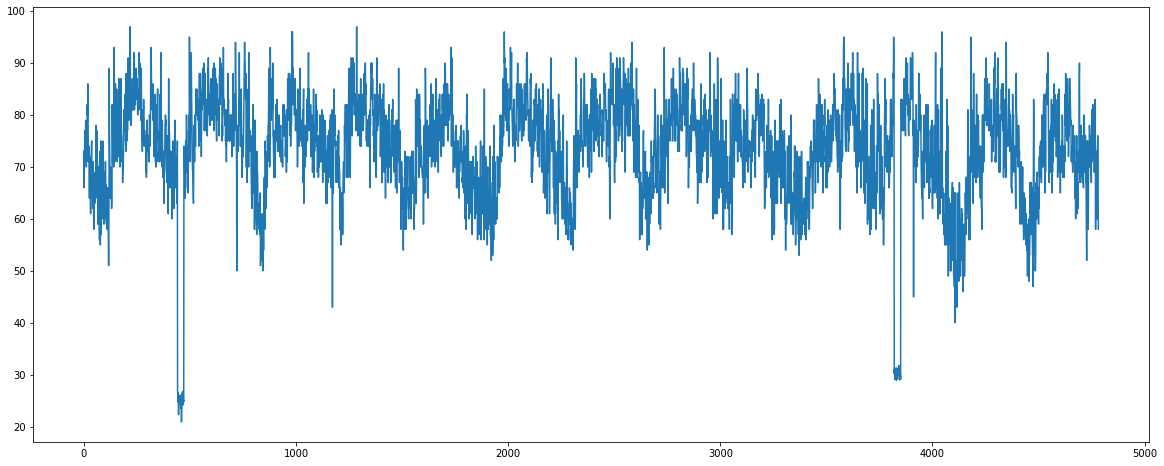

In [2]:
import pandas as pd
import numpy as np
import math
from numpy import array
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from Software import cbrFox


def split_sequences(sequences, n_steps):
    inputnn, target = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix + 1 > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix, (1, 4, 7)]
        inputnn.append(seq_x)
        target.append(seq_y)
    return array(inputnn), array(target)


data = pd.read_csv("C:\\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\sourceCode\weatherdata.csv", parse_dates=True, index_col=1)

data
np.max(data.filter(['HUM_MAX']).values)
step_days = 14
dataset = data.filter(['HUM_MIN', 'HUM_AVG', 'HUM_MAX', 'PRES_MIN', 'PRES_AVG', 'PRES_MAX', 'TEMP_MIN',
                       'TEMP_AVG', 'TEMP_MAX']).values
dataset = np.array(dataset)
# dataset = MinMaxScaler().fit_transform(dataset)
global inputnn, target, input_train, input_test, target_test, target_train
inputnn, target = split_sequences(dataset, step_days)
input_train, input_test, target_train, target_test = train_test_split(inputnn, target, test_size=0.30,
                                                                      random_state=4, shuffle=False)
plt.figure(figsize=(20, 8))
plt.plot(target_train[:, 0])
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(step_days, input_train.shape[2])))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')
history = model.fit(input_train, target_train, validation_data=(input_test, target_test), batch_size=16, epochs=9)

In [3]:
prediction_train = model.predict(input_train)

In [4]:
RMSE = math.sqrt(np.square(np.subtract(prediction_train, target_train)).mean())
print("Root Mean Square Error Train:\n", RMSE)
prediction = model.predict(input_test)
RMSE = math.sqrt(np.square(np.subtract(prediction, target_test)).mean())
print("Root Mean Square Error Test:\n", RMSE)

Root Mean Square Error Train:
 3.8906951997823978
Root Mean Square Error Test:
 3.940696135848991


In [5]:
prediction = model.predict(inputnn[-1].reshape((1, 14, 9)))

In [6]:
windows = inputnn[0:-1]
targetWindow = inputnn[-1]
num_cases = 5
target = target
smoothnessFactor = .04
inputNames = ['HUM_MIN', 'HUM_AVG', 'HUM_MAX', 'PRES_MIN', 'PRES_AVG', 'PRES_MAX', 'TEMP_MIN',
              'TEMP_AVG', 'TEMP_MAX']
outputNames = ['HUM_AVG', 'PRES_AVG', 'TEMP_AVG']
punishedSumFactor = .5

In [41]:
cbrFoxInstancia = sktime_distance_comparison(windows=windows, targetWindow=targetWindow, target=target, prediction=prediction, num_cases=num_cases,
                         smoothnessFactor=smoothnessFactor, inputNames=inputNames, outputNames=outputNames,
                         punishedSumFactor=punishedSumFactor, method="MSM")

In [42]:
cbrFoxInstancia.explain()

Calculando MAE para cada ventana
Generando reporte de análisis


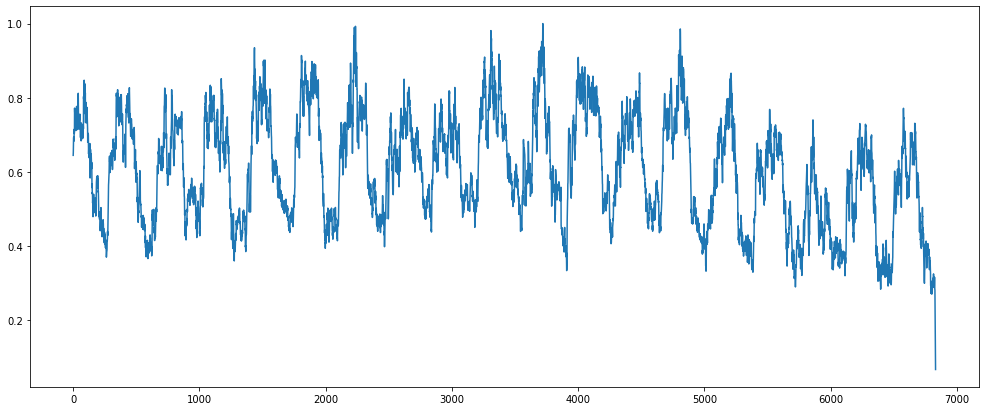

In [43]:
cbrFoxInstancia.visualizeCorrelationPerWindow()

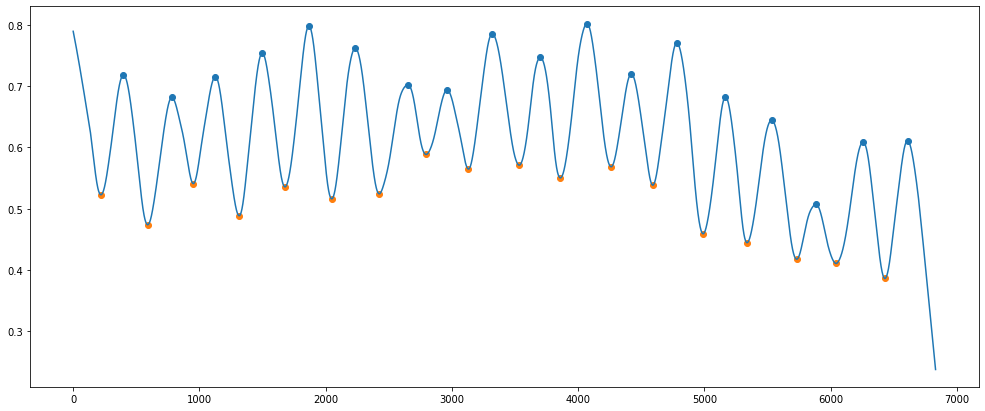

In [44]:
cbrFoxInstancia.visualizeSmoothedCorrelation()

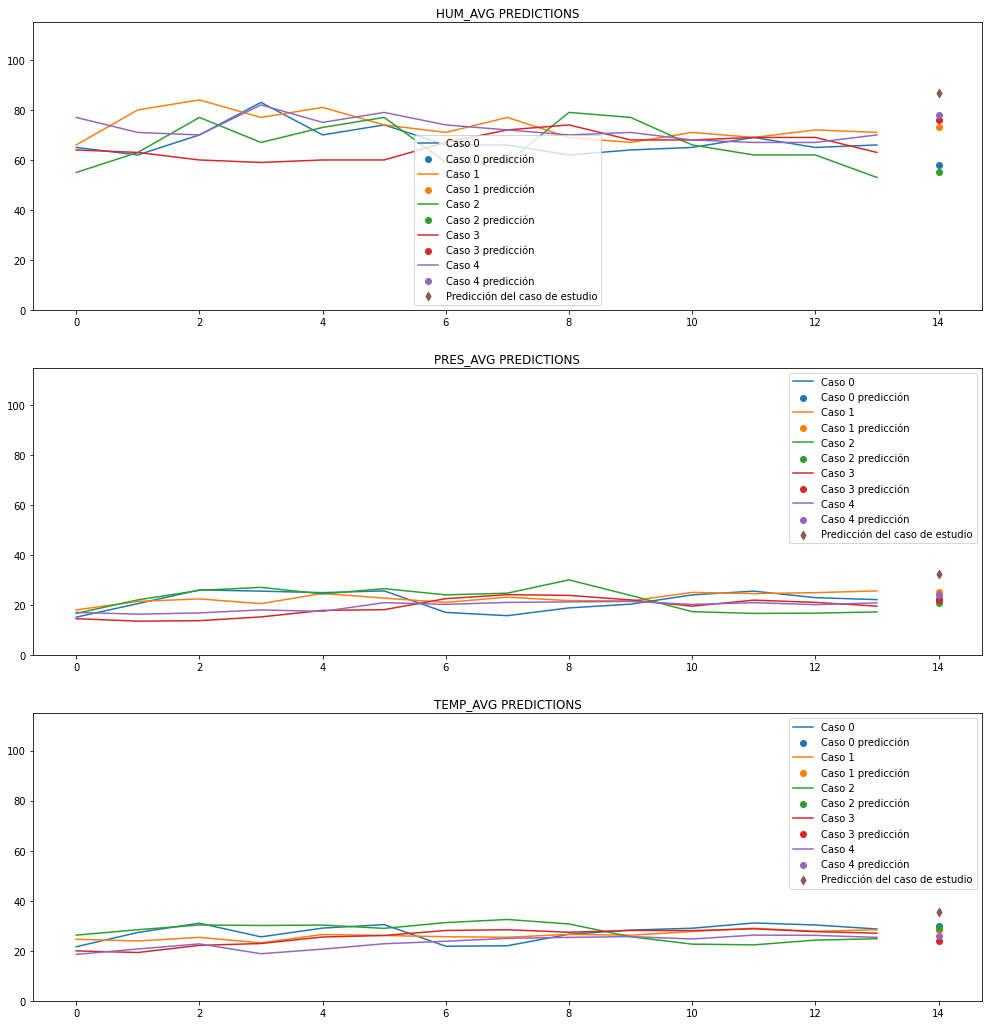

In [45]:
cbrFoxInstancia.visualizeBestHistoryPredictions(figsize= (17, 6*3))

17.624468994140624
15.324468994140624
18.90780232747396
18.707802327473956
14.007802327473959


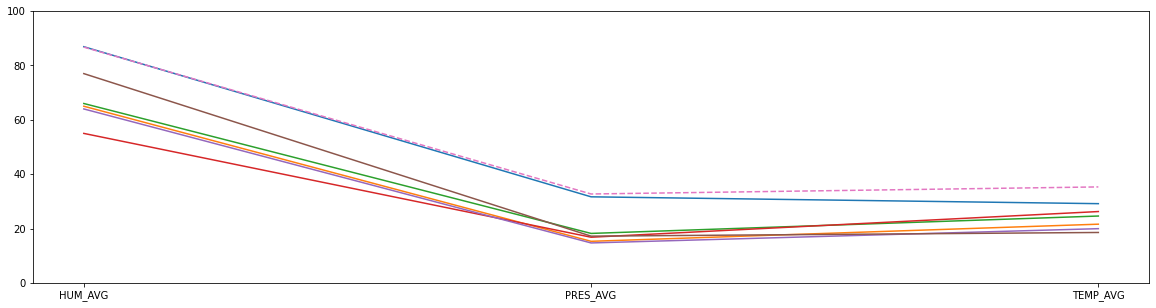

In [46]:
cbrFoxInstancia.visualizeBestCasePredictions()

In [ ]:
cbrFoxInstancia.visualizeWorstHistoryPredictions(figsize= (17, 6*3))

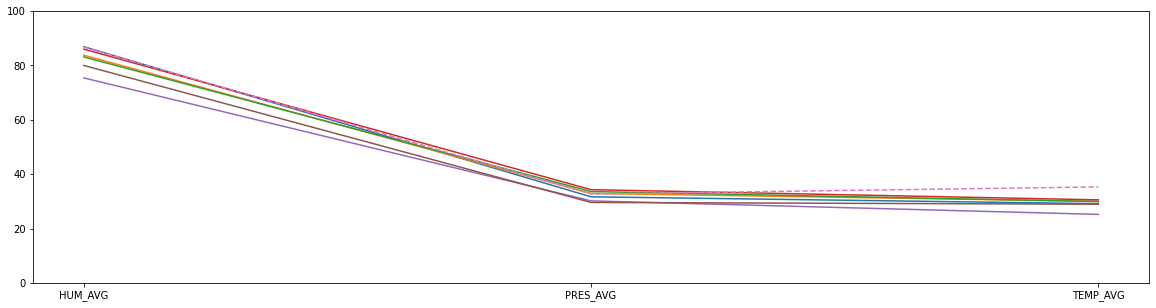

In [49]:
cbrFoxInstancia.visualizeWorstCasePredictions()

In [50]:
cbrFoxInstancia.getAnalysisreport()

,index,CCI,MAE,index.1,CCI.1,MAE.1
0,3720,1.000000,17.624469,6831,0.066356,2.836986
1,2236,0.992623,15.324469,6396,0.283114,3.304558
2,4809,0.985478,18.907802,5721,0.289228,2.368146
3,3309,0.981053,18.707802,6114,0.319432,7.995088
4,1436,0.934815,14.007802,5384,0.328894,5.407802
